# Python Project

In [1]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
headers = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class']
df_iris = pd.read_csv('iris_data.csv', names=headers)

df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [5]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [6]:
df_iris.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [7]:
train, test = train_test_split(df_iris, test_size = 0.4, stratify = df_iris['class'], random_state = 42)

In [8]:
print(train.groupby('class').size())
print(test.groupby('class').size())

class
Iris-setosa        30
Iris-versicolor    30
Iris-virginica     30
dtype: int64
class
Iris-setosa        20
Iris-versicolor    20
Iris-virginica     20
dtype: int64


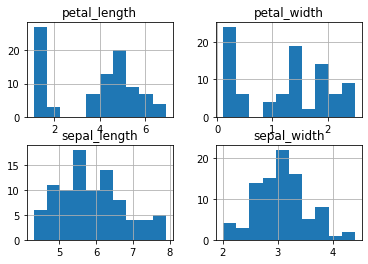

In [9]:
train.hist()

# # histograms
# n_bins = 10
# fig, axs = plt.subplots(2, 2)
# axs[0,0].hist(train['sepal_length'], bins = n_bins);
# axs[0,0].set_title('Sepal Length');
# axs[0,1].hist(train['sepal_width'], bins = n_bins);
# axs[0,1].set_title('Sepal Width');
# axs[1,0].hist(train['petal_length'], bins = n_bins);
# axs[1,0].set_title('Petal Length');
# axs[1,1].hist(train['petal_width'], bins = n_bins);
# axs[1,1].set_title('Petal Width');

# # add some spacing between subplots
# fig.tight_layout(pad=1.0);


plt.show()

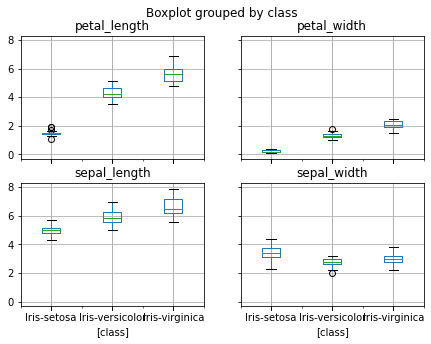

In [10]:
train.boxplot(by='class', figsize=(7,5))
plt.show()

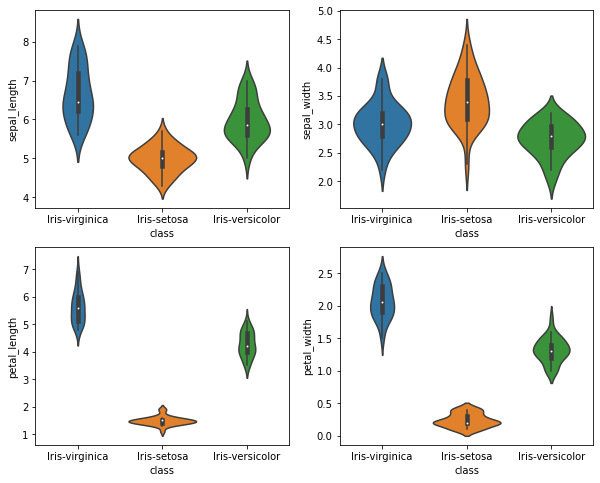

In [11]:
# train.violin(by='class', figsize=(7,5))
# plt.show()

# ax = sns.violinplot(x="class", y="sepal_length", data=train)

# fig, axs = plt.subplots(2, 2)
# axs[0,0] = sns.violinplot(x="class", y="sepal_length", data=train)
# axs[1,0] = sns.violinplot(x="class", y="sepal_width", data=train)
# plt.show()


# ax = fig.add_subplot(221)
# sns.violinplot(x="class", y="sepal_length",
#                data=train, split=True, ax=ax)

# ax = fig.add_subplot(222)
# sns.violinplot(x="class", y="sepal_width",
#                data=train, split=True, ax=ax)

# ax = fig.add_subplot(223)
# sns.violinplot(x="class", y="petal_length",
#                data=train, split=True, ax=ax)

# ax = fig.add_subplot(224)
# sns.violinplot(x="class", y="petal_width",
#                data=train, split=True, ax=ax)


headers = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class']

fig = plt.figure(figsize=(10, 8))

for i in range(4):
    ax = fig.add_subplot(221 + i)
    sns.violinplot(x="class", y=headers[i],
               data=train, split=True, ax=ax)
 

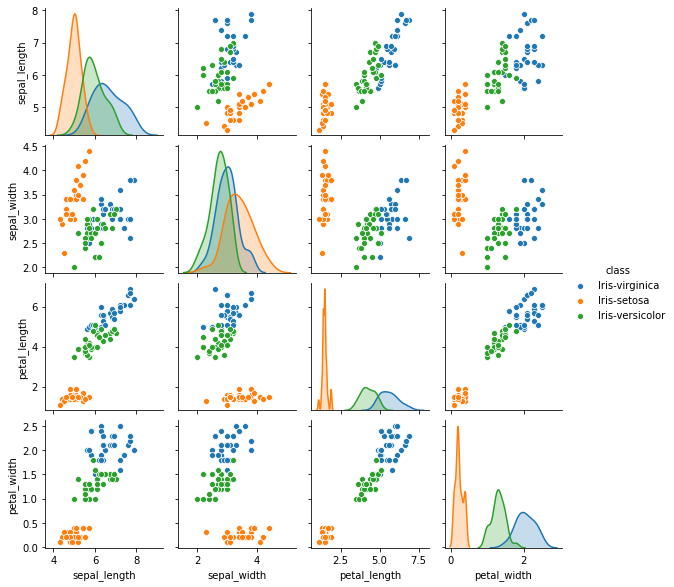

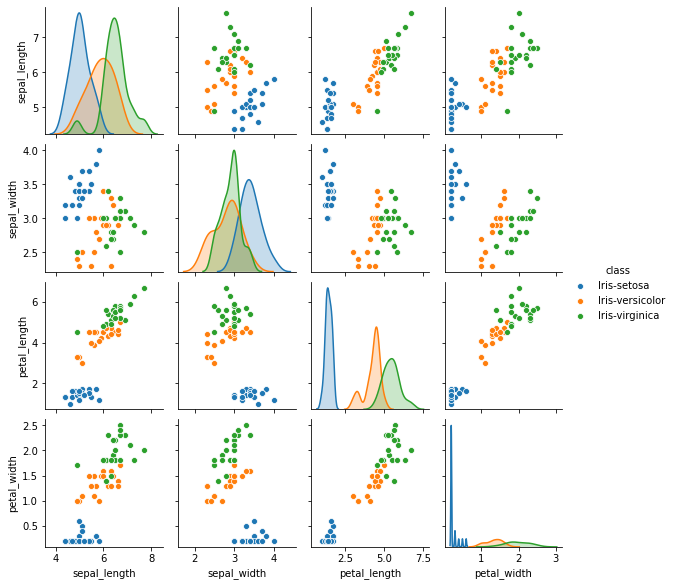

In [12]:
sns.pairplot(train, hue="class", height = 2); #, palette = 'colorblind'
print()
sns.pairplot(test, hue="class", height = 2); #, palette = 'colorblind'

In [13]:
'''
The scatter matrix reveals the cluster patterns of the different classes in the data. The diagram demonstrates that the petal 
features produced a separated clusters among the classes than the sepal features. This visualizations suggests that the petal 
feature may produced higher performing classification models than the sepal features. 
'''

'\nThe scatter matrix reveals the cluster patterns of the different classes in the data. The diagram demonstrates that the petal \nfeatures produced a separated clusters among the classes than the sepal features. This visualizations suggests that the petal \nfeature may produced higher performing classification models than the sepal features. \n'

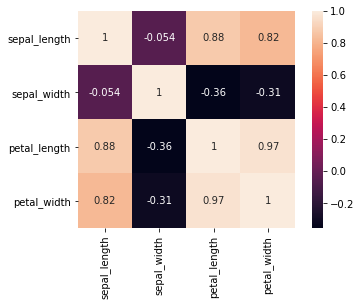

In [14]:
# correlation matrix
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

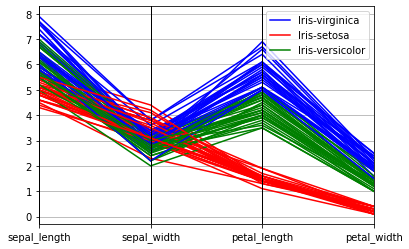

In [15]:
# parallel coordinates
parallel_coordinates(train, "class", color = ['blue', 'red', 'green']);

In [16]:
'''
Similarly, the parallel coordinate graph show a well aligned and separated classes for the petal features. The sepal features have
the classes mixed up and not clearly distinct.
'''

'\nSimilarly, the parallel coordinate graph show a well aligned and separated classes for the petal features. The sepal features have\nthe classes mixed up and not clearly distinct.\n'

# Building The Classifiers

In [17]:
# You need to fill this out using this format 
# Model development
X_train = train[headers[:-1]]
y_train = train['class']
X_test = test[headers[:-1]]
y_test = test[headers[-1]]

print(X_train.head(), X_test.head())

     sepal_length  sepal_width  petal_length  petal_width
130           7.4          2.8           6.1          1.9
6             4.6          3.4           1.4          0.3
94            5.6          2.7           4.2          1.3
96            5.7          2.9           4.2          1.3
26            5.0          3.4           1.6          0.4      sepal_length  sepal_width  petal_length  petal_width
40            5.0          3.5           1.3          0.3
61            5.9          3.0           4.2          1.5
18            5.7          3.8           1.7          0.3
49            5.0          3.3           1.4          0.2
106           4.9          2.5           4.5          1.7


In [18]:
# CLassification Tree

In [19]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

print(mod_dt.feature_importances_)

The accuracy of the Decision Tree is 0.983
[0.         0.         0.42430866 0.57569134]


In [20]:
'''
The feature importance clearing reinforce the observations made from the visualizations. The sepal features are zero, and the 
sepal features are 42% and 58% for the length and the width respectively.
'''

'\nThe feature importance clearing reinforce the observations made from the visualizations. The sepal features are zero, and the \nsepal features are 42% and 58% for the length and the width respectively.\n'

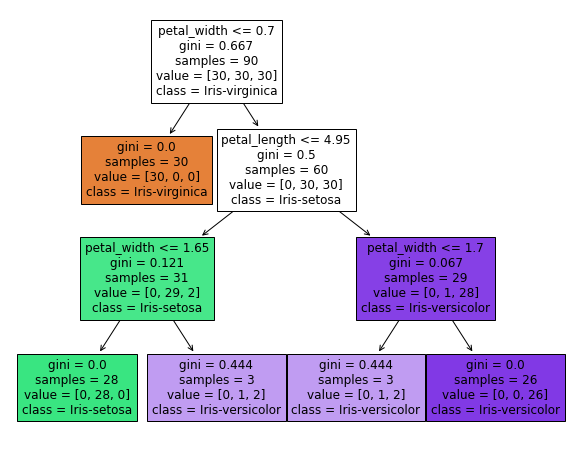

In [21]:
# Example code to build plot tree
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = headers[:-1], class_names = y_train.unique().tolist(), filled = True);

In [47]:
'''
The tree diagram shows the nodes being only petal length and width. The tree construct was primarily attached based on only 
the petal features.
'''

'\nThe tree diagram shows the nodes being only petal length and width. The tree construct was primarily attached based on only \nthe petal features.\n'

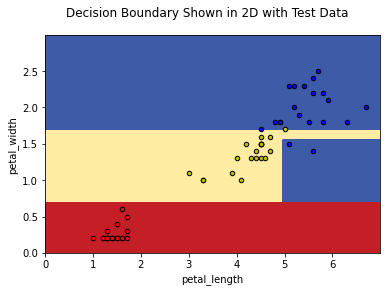

In [23]:
# Example code: will need some tweaking
# plot decision boundary for pedal width vs pedal length
plot_step = 0.01
plot_colors = "ryb"
xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

selected_predictors = ["petal_length", "petal_width"]
mod_dt_1 = DecisionTreeClassifier(max_depth = 3, random_state = 1)
y_train_en = y_train.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).copy()
mod_dt_1.fit(X_train[selected_predictors],y_train_en)

pred_all = mod_dt_1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=plt.cm.RdYlBu)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

# plot test data points
n_class = 3
cn = ['Iris-setosa','Iris-versicolor','Iris-virginica']
#cn = y_train.unique().tolist()
for i, color in zip(cn, plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(X_test.iloc[idx, 2], X_test.iloc[idx, 3], c=color, 
                label=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.suptitle("Decision Boundary Shown in 2D with Test Data")
plt.axis("tight");

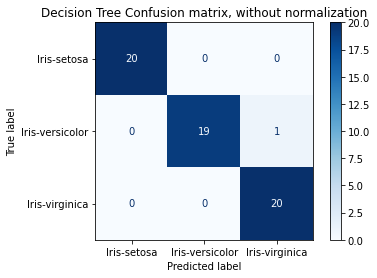

In [24]:
# example code for confusion matrix will need tweaking
# one versicolor misclassified
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

In [48]:
'''
The confusion matrix reveal that only one data point was misclassified. One versicolor species was classified as virginica. 
This sigle miss constituted 1.7% of the total accuracy.
'''

'\nThe confusion matrix reveal that only one data point was misclassified. One versicolor species was classified as virginica. \nThis sigle miss constituted 1.7% of the total accuracy.\n'

# Gaussian Naive Bayes Classifier

In [26]:
# Example code for Guassian Naive Bayes Classifier to help you make your own
mod_gnb_all = GaussianNB()
y_pred = mod_gnb_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the Guassian Naive Bayes Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Guassian Naive Bayes Classifier on test data is 0.933


In [27]:
# Using only Petal features

In [28]:
# Modfy this example to make your own
# Guassian Naive Bayes Classifier with two predictors
mod_gnb = GaussianNB()
y_pred = mod_gnb.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the Guassian Naive Bayes Classifier with 2 predictors on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Guassian Naive Bayes Classifier with 2 predictors on test data is 0.950


In [29]:
'''
The model created using only the petal features outperfromed the model created using all the four features. This outcome could 
be due to overfitting of the model from the sepal features, or, the sepal features did not contribute much to the infomation in
the dataset. These features rather made the data less classifiable.
'''

# Linear Discriminant Analysis

In [30]:
# Example LDA Classifier
mod_lda_all = LinearDiscriminantAnalysis()
y_pred = mod_lda_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the LDA Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the LDA Classifier on test data is 0.983


In [31]:
# Using only Petal features

In [32]:
# Example LDA Classifier with two predictors
mod_lda = LinearDiscriminantAnalysis()
y_pred = mod_lda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the LDA Classifier with two predictors on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the LDA Classifier with two predictors on test data is 0.933


In [33]:
# Decision Boundaries

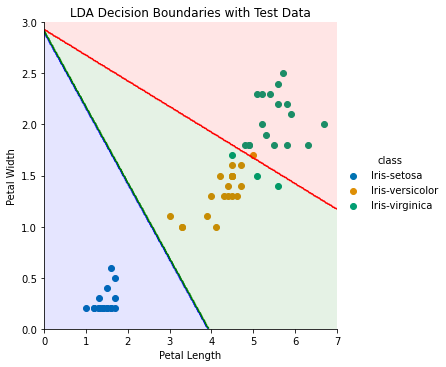

In [34]:
# An example: please tweak it for your own code
# LDA with 2 predictors
mod_lda_1 = LinearDiscriminantAnalysis()
y_pred = mod_lda_1.fit(X_train[selected_predictors], y_train_en).predict(X_test[selected_predictors])

N = 300
X = np.linspace(0, 7, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(test, hue="class", height=5, palette = 'colorblind').map(plt.scatter,"petal_length", "petal_width", ).add_legend()
my_ax = g.ax

zz = np.array([mod_lda_1.predict(np.array([[xx,yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
Z = zz.reshape(X.shape)

# Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

#Add axis and title
my_ax.set_xlabel('Petal Length')
my_ax.set_ylabel('Petal Width')
my_ax.set_title('LDA Decision Boundaries with Test Data'); 

In [35]:
'''
The LDA, on the other hand, produced a higher accuracy with all four features than with only the two petal features. 
The visualization illustrates that the dataset is linearly classifiable.
'''

# Quadratic Discriminant Analysis (QDA)

In [36]:
# Example QDA Classifier
mod_qda_all = QuadraticDiscriminantAnalysis()
y_pred = mod_qda_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the QDA Classifier is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the QDA Classifier is 0.983


In [37]:
# Using only Petal features

In [38]:
# QDA Classifier with two predictors
mod_qda = QuadraticDiscriminantAnalysis()
y_pred = mod_qda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the QDA Classifier with two predictors is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the QDA Classifier with two predictors is 0.967


In [39]:
# Decision Boundaries

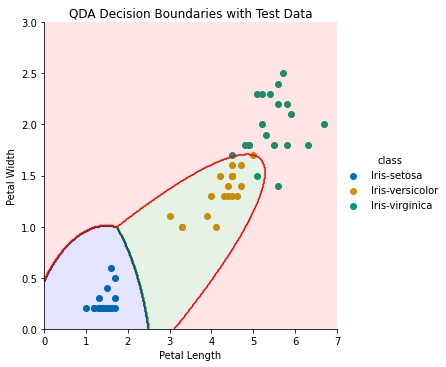

In [40]:
# Eaxmple QDA with 2 predictors
mod_qda_1 = QuadraticDiscriminantAnalysis()
y_pred = mod_qda_1.fit(X_train.iloc[:,2:4], y_train_en).predict(X_test.iloc[:,2:4])

N = 300
X = np.linspace(0, 7, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(test, hue="class", height=5, palette = 'colorblind').map(plt.scatter,"petal_length", "petal_width", ).add_legend()
my_ax = g.ax

zz = np.array([mod_qda_1.predict(np.array([[xx,yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

#Addd axis and title
my_ax.set_xlabel('Petal Length')
my_ax.set_ylabel('Petal Width')
my_ax.set_title('QDA Decision Boundaries with Test Data');

In [41]:
# Findings and Conclusions

In [ ]:
'''
Similar to the LDA, the model with the 4 features did better than the model with the two features.
'''

# K Nearest Neighbors (K-NN)

In [42]:
# an example to tweak
#KNN, first try 5
mod_5nn=KNeighborsClassifier(n_neighbors=5) # k of 3 gave 96.7% 
mod_5nn.fit(X_train,y_train)
prediction=mod_5nn.predict(X_test)
print('The accuracy of the 5NN Classifier is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the 5NN Classifier is 0.933


In [43]:
# Decision Boundaries

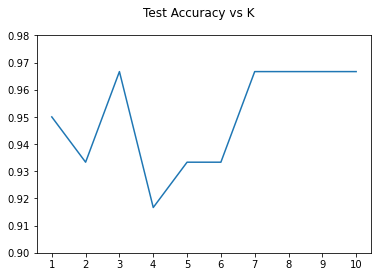

In [44]:
# an example
#try different k
acc_s = pd.Series(dtype = 'float')
for i in list(range(1,11)):
    mod_knn=KNeighborsClassifier(n_neighbors=i) 
    mod_knn.fit(X_train,y_train)
    prediction=mod_knn.predict(X_test)
    acc_s = acc_s.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
    
plt.plot(list(range(1,11)), acc_s)
plt.suptitle("Test Accuracy vs K")
plt.xticks(list(range(1,11)))
plt.ylim(0.9,0.98);

In [45]:
'''
The highest accuracies scores were produced by a neighborhood size of 3, 7, 8, 9 and 10. This suggests that the model becomes 
more accurate as it is made more generalized. The higher the K values, the more generalized the model.
'''